# Single Parameter Bayesian Statistics

This serves as a basic introduction to Bayesian analysis using R, all contained in a nice Jupyter notebook. I am writing these as I myself learn the main concepts. 

First lets start by looking at a biased coin toss and how to plot a binomial distribution of that. After that we will look at prior probabilities and how they affect our likelihood function and our resultant posterior probability density function (pdf).

Mandatory Reading:

* Data Analyasis: A Bayesian Tutorial, D. S. Sivia, J. Skilling.

Additional Reading:

* Probability Theory, E. T. Jaynes

Both of these books should be stocked by any self-respecting academic institution!


In [4]:
#Lets declare a function which samples our biased coin toss.
#All heads would be at 0 on our binomial distribution.
#All tails would be at 1.
FlipCoin = function(n) sample(c("Heads","Tails"), n, rep=T,prob = c(0.55,0.45))
No_of_tosses = 100
#Lets flip that coin a few times...
C = FlipCoin(No_of_tosses)
    
#Plot a table of the results
table(C)
    

C
Heads Tails 
   53    47 

In [5]:
# Lets look at the probabilities now:
prop.table(table(C))

C
Heads Tails 
 0.53  0.47 

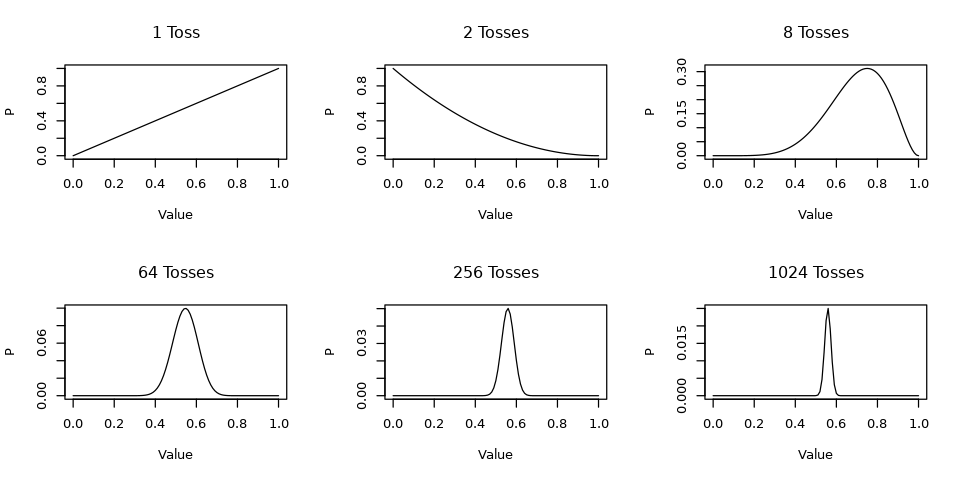

In [6]:
library(repr)
#Plot binomial distribution of the coin toss for different values:
calcLikelihood <- function(successes,total,title_str){
    options(repr.plot.width=8,repr.plot.height=4,jupyter.plot_mimetypes = 'image/png')
    curve(dbinom(successes,total,x),xlab='Value',ylab='P')
    title(main=title_str)
}
par(mfrow=c(2,3))

No_of_tosses = 1
C = FlipCoin(No_of_tosses)
calcLikelihood(sum(C=="Heads"),No_of_tosses,"1 Toss")
No_of_tosses = 2
C = FlipCoin(No_of_tosses)
calcLikelihood(sum(C=="Heads"),No_of_tosses,"2 Tosses")
No_of_tosses = 8
C = FlipCoin(No_of_tosses)
calcLikelihood(sum(C=="Heads"),No_of_tosses,"8 Tosses")
No_of_tosses = 64
C = FlipCoin(No_of_tosses)
calcLikelihood(sum(C=="Heads"),No_of_tosses,"64 Tosses")
No_of_tosses = 256
C = FlipCoin(No_of_tosses)
calcLikelihood(sum(C=="Heads"),No_of_tosses,"256 Tosses")
No_of_tosses = 1024
C = FlipCoin(No_of_tosses)
calcLikelihood(sum(C=="Heads"),No_of_tosses,"1024 Tosses")




# Prior Probabilities

As we can see, when the sample number increases we feel more confident in declaring what the likely true value is, hence the range of the probability becomes a lot smaller. Most people know this from doing maths as a teenager, but lets explore how prior assumptions affect our probability density function! Thus we will go from a frequentist interpretation of probability into the world of Bayesian inference.

First lets plot several prior probability density functions:

* A completely uniform probability. This reflects no prior understanding of how the coin is biased.
* A fair coin. 
* A poor estimate of the bias.
* A good estimate of the bias.

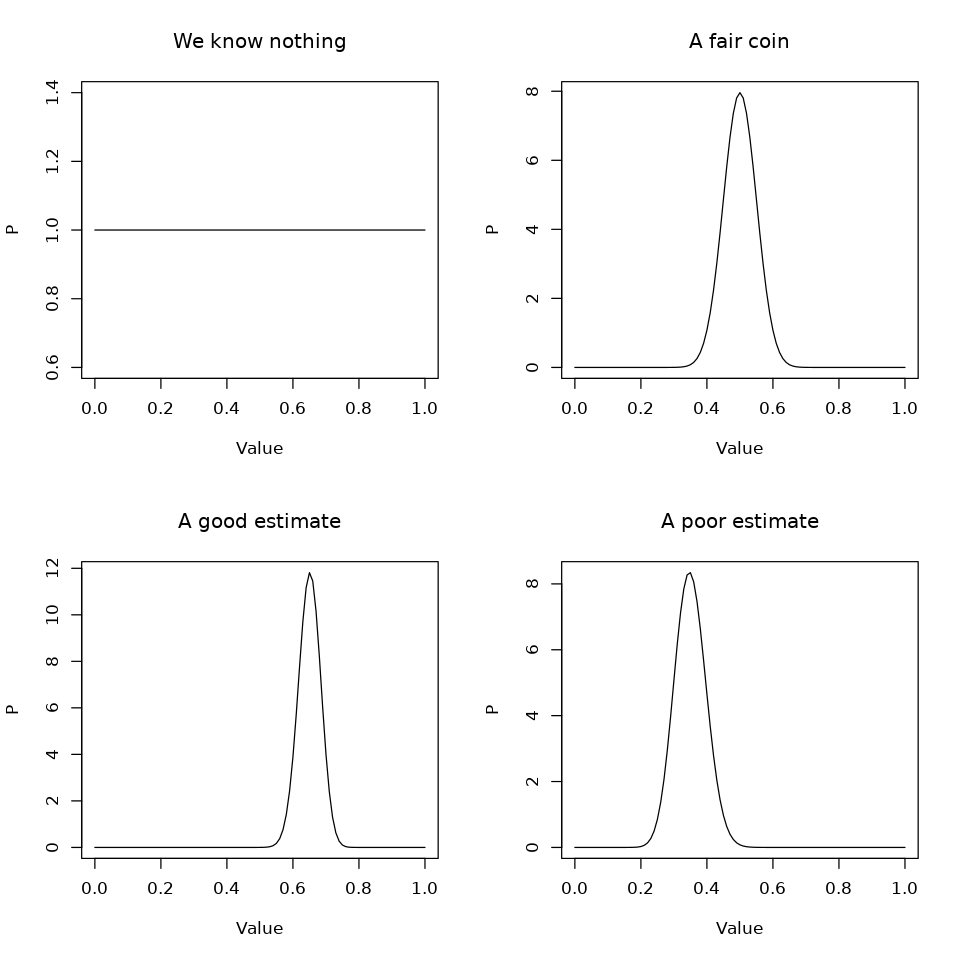

In [7]:
# This assumes a completely naive understanding of the biasing of the coin.
par(mfrow=c(2,2))
options(repr.plot.width=8,repr.plot.height=8)
curve(dunif(min=0,max=1,x),main="We know nothing",xlab="Value",ylab="P")
# This assumes a fair coin, not one of those Las vegas coins Sivia warns us about!
curve(dbeta(x,50,50),main="A fair coin",xlab="Value",ylab="P")
# This assumes a pretty good guess of where the coins bias lies
curve(dbeta(x,130,70),main="A good estimate",xlab="Value",ylab="P")
# This assumes a poor estimate of where the bias lies
curve(dbeta(x,35,65),main="A poor estimate",xlab="Value",ylab="P")

$probs
[1] 0.2335215 0.7664785

$betapar
     [,1] [,2]
[1,]  567  453
[2,]  562  453



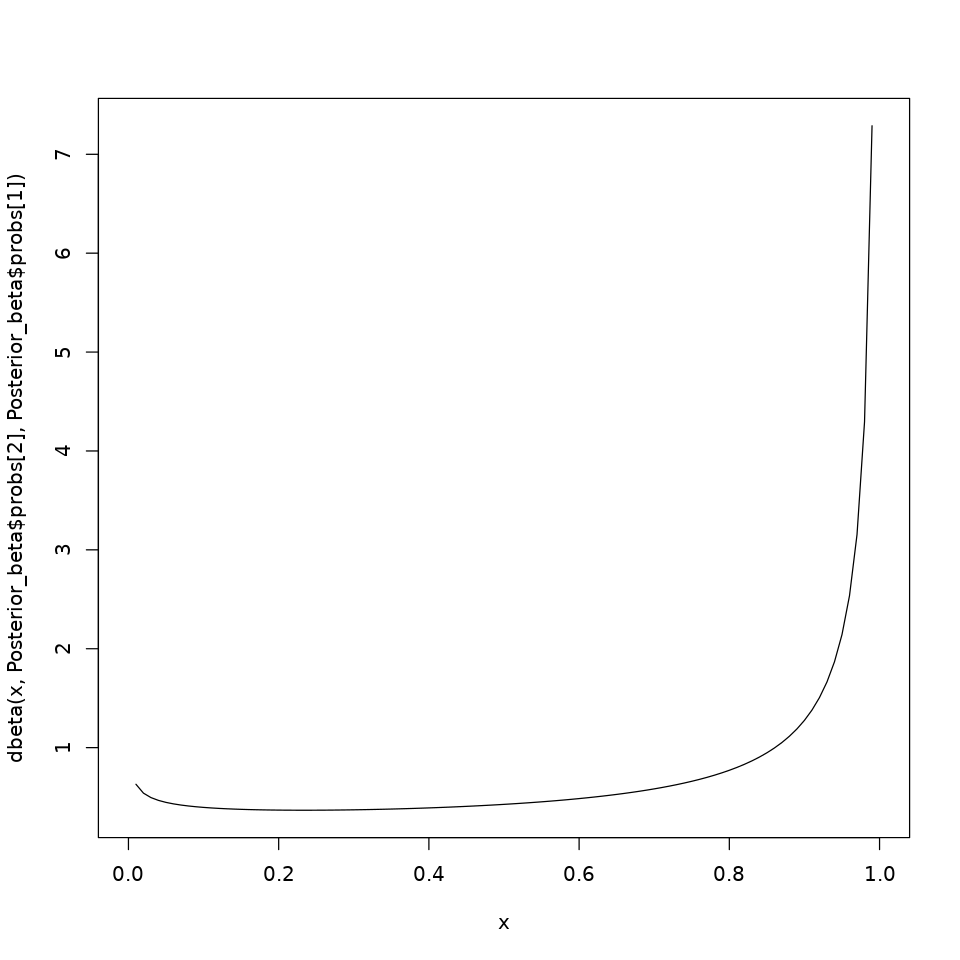

In [12]:
#Lets use the LearnBayes library for this.
library(LearnBayes)

#Plot a posterior probability using our fair prior and some sampled data:
No_of_tosses=100
C=FlipCoin(1000)
Posterior_beta <- binomial.beta.mix(c(0.5,0.5),rbind(c(15,5),c(10,5)),c(sum(C=="Heads"),sum(C=="Tails")))
print(Posterior_beta)

curve(dbeta(x,Posterior_beta$probs[2],Posterior_beta$probs[1]))